# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [552]:
# use these links to do so: 
import numpy as np                  # N- dimension matrix representation
import pandas as pd                 # Data processing
import matplotlib.pyplot as plt     # Data Visualization
import seaborn as sns               # Data Visualization

### Understanding the data

The objective is reducing customer churn by identifying potential churn candidates beforehand, and take proactive actions to make them stay.

In [553]:
# Exploring dataset using pandas
churn_data = pd.read_csv('Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [554]:
# Size of the dataset
print('Churn data contains {} customers and {} measures/predictors with 1 target column(Churn Yes / NO)'.format(churn_data.shape[0] , churn_data.shape[1] -1))

Churn data contains 7043 customers and 20 measures/predictors with 1 target column(Churn Yes / NO)


In [555]:
# Whether dataset contains missing values
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

The data has categorical values too. shows that it contains no missing values , but analysing much more insights tells the truth abour whether dataset has missing values or not.

In [556]:
#Seperating Categorical columns and numerical columns to interpret data 
categorical_features = churn_data.select_dtypes(include = np.object)
print('features contains categorical values,')
categorical_features.columns

features contains categorical values,


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [557]:
numerical_features = churn_data.select_dtypes(include = [np.int64,np.float64])
print('Features that contains numerical values,')
numerical_features.columns.tolist()

Features that contains numerical values,


['SeniorCitizen', 'tenure', 'MonthlyCharges']

Only TotalCharges is in Object type but dataset contains float values as monthly charges.

### Data Manipulation

TotalCharges feature contains float values in dataset but it shows us as object type. (maybe this feature contains some unwanted values in it).

In [558]:
churn_data['TotalCharges'].dtypes

#checking for missing values in categorical features
categoric_data = churn_data.select_dtypes(include = np.object)
categoric_data.columns.tolist()
for i in categoric_data.columns.tolist():
    for j in (categoric_data[i].unique().tolist()):
        if j == " ":
            print('Yes , {} feature has missing values'.format(i))

Yes , TotalCharges feature has missing values


In [559]:
#Yes , the dataset contains object type with empty strings in it
count = 0
for i in churn_data['TotalCharges'].unique().tolist():
    if i == " ":
        print(True)

True


In [560]:
#Replacing the empty strings to NaN values
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(" ",np.nan)

In [561]:
#There contains 11 nan values
churn_data['TotalCharges'].isnull().sum()

11

In [562]:
#dropping rows that contains missing values in TotalCharges feature
churn_data.dropna(inplace = True)

In [563]:
#dropped 11 rows from the dataset (that doesnt make much diffrence)
churn_data.shape[0]

7032

In [564]:
#Changing the object type to float
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

In [565]:
#While seeing the unique values , Seversl categorical features contains 3 types (Yes /no/no internet service). But we can take it as Yes/No.

categorical_features.nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [566]:
churn_data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [567]:
#eplacing from No service to No
columns_replace = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in columns_replace:
    churn_data[col].replace('No internet service' , 'No',inplace = True)

In [568]:
# MultipleLines Feature has extra unwanted value as 'No phone service'. Replacing that
churn_data['MultipleLines'].replace('No phone service','No',inplace = True)

In [569]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [570]:
#description about the data
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


This table shows that there is no missing values and the numerical features has no outliers in it because there is no seperate distribution from the mean.

### Data Visualization
Exploratory Data Analysis

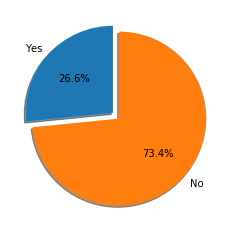

In [571]:
# Visualizing the pie chart that represents the churn feature (Yes/No)
labels = 'Yes' , 'No'
sizes = [churn_data[churn_data.Churn == 'Yes']['Churn'].value_counts() , churn_data[churn_data.Churn == 'No']['Churn'].value_counts()]
explode = (0.1,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

churn rate is around 27% . ie., 27% of the customers were dissatisfied with company's service

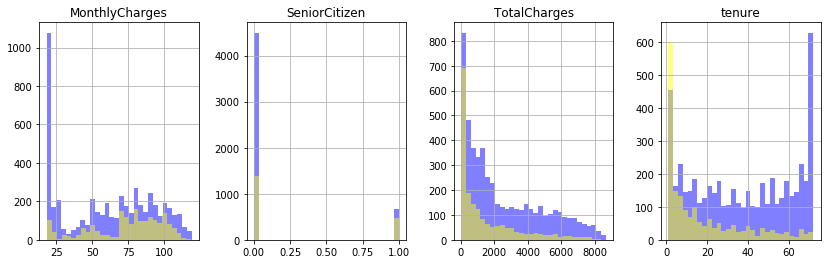

In [572]:
#By seeking histogram to visualize the distribution in the dataset with respect to churn feature
numerical_features = churn_data.select_dtypes(include =[np.int64,np.float64])
numerical_features.columns
fig, ax = plt.subplots(1, 4, figsize=(14,4))
churn_data[churn_data.Churn == "No"][numerical_features.columns].hist(bins=30, color="blue", alpha=0.5, ax=ax)
churn_data[churn_data.Churn == "Yes"][numerical_features.columns].hist(bins=30, color="yellow", alpha=0.5, ax=ax )
plt.show()

From the plot,
1. Recent clients are more likely to churn
2. Clients with higher MonthlyCharges are  more likely to churn

tenure is numerical, but often we don’t care about small numeric differences and instead group tenure to customers with short, medium and long term tenure

In [573]:
# Visualizing categorical features using bar graph
categorical_features = churn_data.select_dtypes(include = np.object)
categorical_features.drop('customerID',axis = 1 , inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


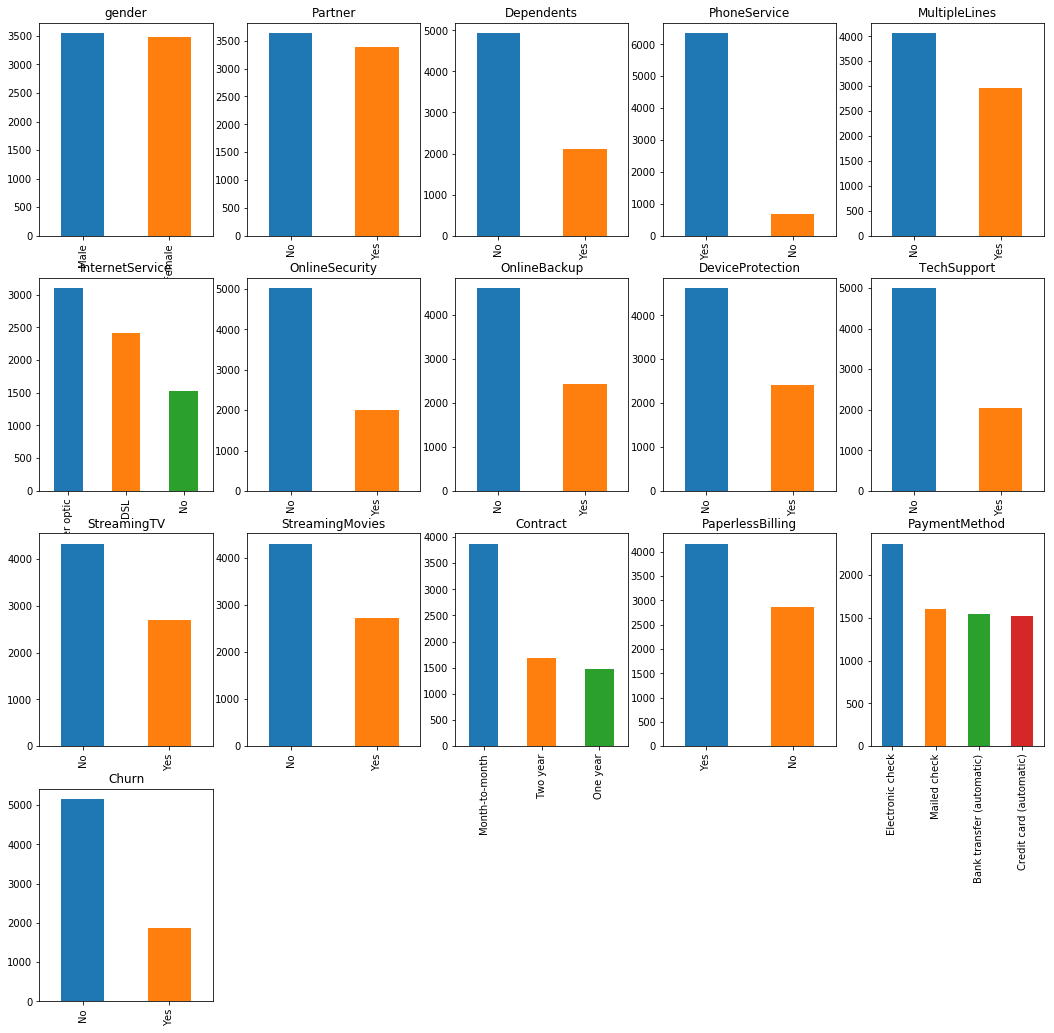

In [574]:
fig, ax = plt.subplots(4, 5, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features.columns):
    if col == 4:
        row += 1
    col = i % 5
    churn_data[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)
for i in range(1,5,1):
    fig.delaxes(ax[3][i])
plt.show()

The plot shows that ,
Few customers doesn't have phone service

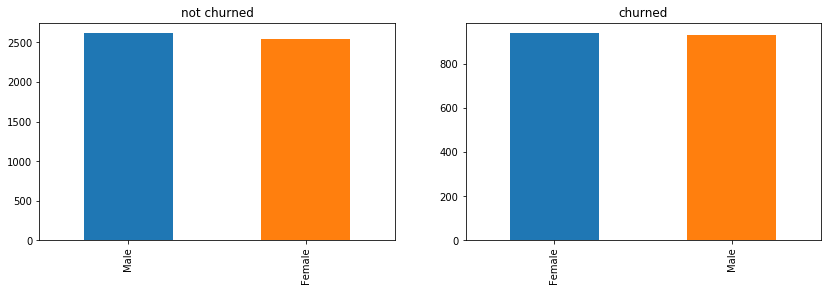

In [575]:
#Visualizing whther feamle /male  are more likely to churn
feature = 'gender'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
churn_data[churn_data.Churn =='No'][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
churn_data[churn_data.Churn == 'Yes'][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')
plt.show()

The plot shows roughly one quarter of the male customers churn, and  one quarter of the female customers churn. 

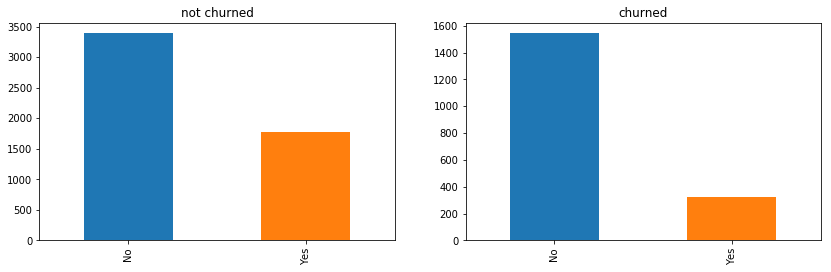

In [576]:
#Visualizing whther  Dependants/Non-Dependants  are more likely to churn

feature = 'Dependents'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
churn_data[churn_data.Churn =='No'][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
churn_data[churn_data.Churn == 'Yes'][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')
plt.show()

Customers who have No-Dependents have more likely to churn.

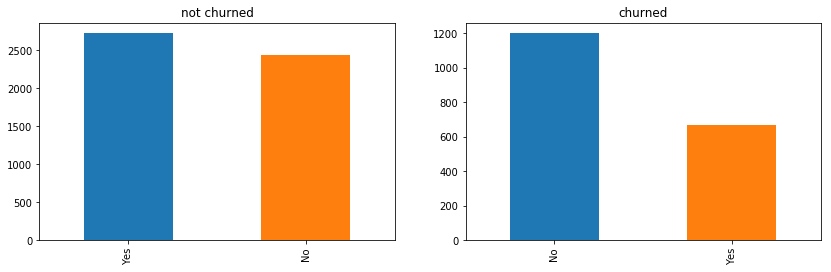

In [577]:
#Visualizing whther customer with patners /without patners  are more likely to churn

feature = 'Partner'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
churn_data[churn_data.Churn =='No'][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
churn_data[churn_data.Churn == 'Yes'][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')
plt.show()

The plot shows that half of the total people have partners. Customers without partner is more likely to churn.

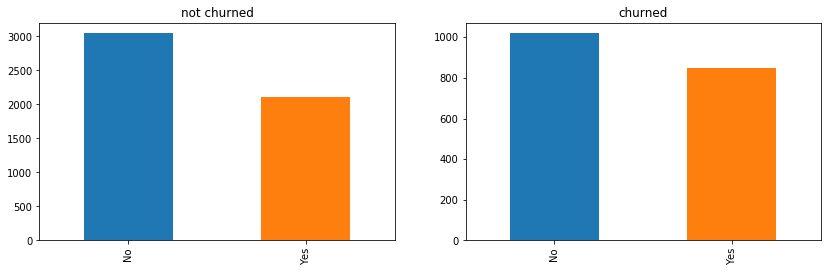

In [578]:
#Visualizing whther Customers with  / without MultipleLines are more likely to churn

feature = 'MultipleLines'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
churn_data[churn_data.Churn =='No'][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
churn_data[churn_data.Churn == 'Yes'][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')
plt.show()

Customers with multiple lines have a slightly higher churn rate

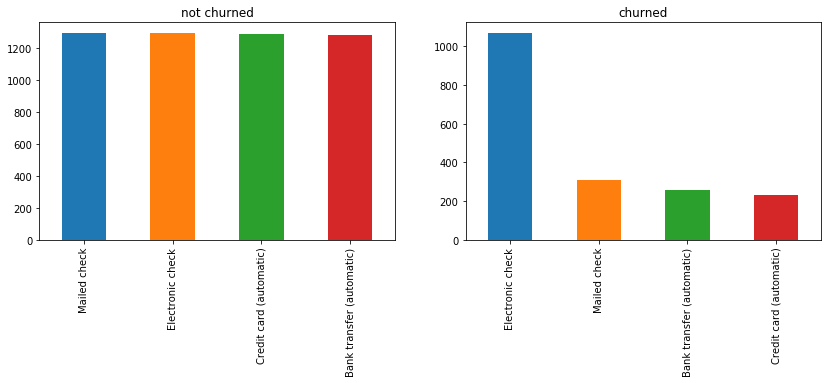

In [579]:
#Visualizing whther Customers with kind of payment methods  are more likely to churn

feature = 'PaymentMethod'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
churn_data[churn_data.Churn =='No'][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
churn_data[churn_data.Churn == 'Yes'][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')
plt.show()

The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate

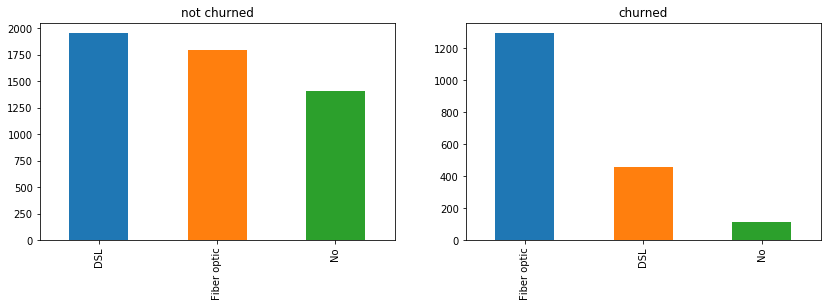

In [580]:
#Visualizing whther Customers with types of Internet Service are more likely to churn

feature = 'InternetService'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
churn_data[churn_data.Churn =='No'][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
churn_data[churn_data.Churn == 'Yes'][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')
plt.show()

Customers with fiber are more probable to churn than those with DSL connection

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


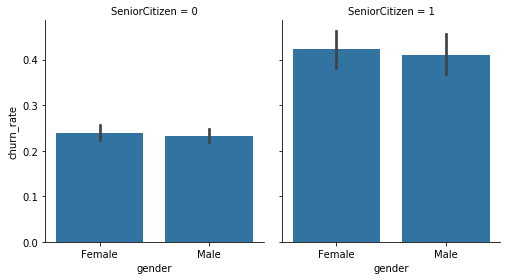

In [581]:

churn_data['churn_rate'] = churn_data['Churn'].replace("No", 0).replace("Yes", 1)
plot = sns.FacetGrid(churn_data, col="SeniorCitizen", height=4, aspect=.9)
ax = plot.map(sns.barplot, "gender", "churn_rate", order= ['Female', 'Male'])

Gender is not an indicative of churn.

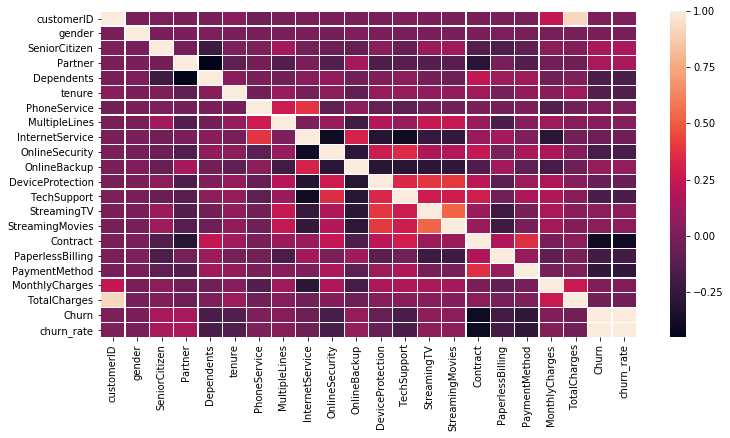

In [582]:
plt.figure(figsize=(12, 6))

corr = churn_data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2)

### Data Preprocessing

In [583]:
#CustomerID wont give much information about data. So, dropping that feature is better option
churn_data.drop('customerID',axis=1,inplace = True)

In [584]:
#Taking Target label seperately
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y = encode.fit_transform(churn_data['Churn'])  #label


In [585]:
#Dropping Churn feature from the original data
churn_data.drop('Churn',axis = 1,inplace=True)

In [586]:
#One Hot Encoding Technique
churn_data = pd.get_dummies(churn_data , drop_first = True)

In [587]:
churn_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_rate,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [588]:
print('The no. of features after using pandas dummies', churn_data.shape[1])

The no. of features after using pandas dummies 24


### Implement Machine Learning Models

In [589]:
# Input features and Label
X = churn_data.values
y

array([0, 0, 1, ..., 0, 1, 0])

In [590]:
#importing sklearnlibraries 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,confusion_matrix

In [591]:
#Using every categoricl model to see which model best fit for this problem

models = [
    LogisticRegression(),
    KNeighborsClassifier(11),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 33, random_state = 1),
    GaussianNB()]

### Model Evaluation

In [529]:
for clf in models:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print()
    print(name)
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_test, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_test, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_test, y_pred, average='weighted')
    print("f1_score: ",f_score)
    print()
    print('**********')
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



LogisticRegression
accuracy:  0.8109452736318408
precision:  0.6618181818181819
recall:  0.5126760563380282
f1_score:  0.8024043397177727

**********

KNeighborsClassifier
accuracy:  0.7882018479033405
precision:  0.6059479553903345
recall:  0.4591549295774648
f1_score:  0.7777653767890937

**********

SVC
accuracy:  0.7938877043354655
precision:  0.7070063694267515
recall:  0.3126760563380282
f1_score:  0.7628980418861074

**********

DecisionTreeClassifier
accuracy:  0.7370291400142146
precision:  0.48184019370460046
recall:  0.5605633802816902
f1_score:  0.7432316808031479

**********

RandomForestClassifier
accuracy:  0.7910447761194029
precision:  0.6062717770034843
recall:  0.49014084507042255
f1_score:  0.7832495497418676

**********

GaussianNB
accuracy:  0.7412935323383084
precision:  0.49146110056925996
recall:  0.7295774647887324
f1_score:  0.7550029601573126

**********


Logistic Regression gives best performance than any other model.

In [592]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


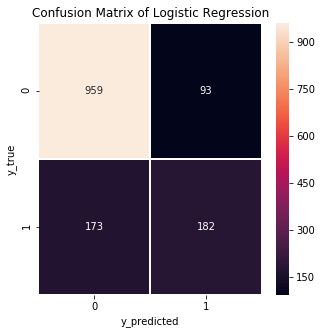

In [593]:
#confusion matrix to Visualize the classification of data
cm_lr = confusion_matrix(y_test,lr_model.predict(X_test))


f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [595]:
# ROC curve,
yproba = lr_model.predict_proba(X_test)[::,1]
#False Positive Rate , True Positive Rate
fpr, tpr, _ = roc_curve(y_test,  yproba)
auc = roc_auc_score(y_test, yproba)

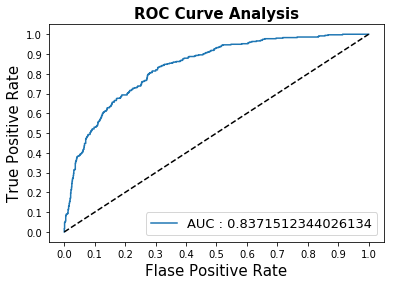

In [596]:
#Visualizing ROC curve
plt.plot(fpr,tpr,label='AUC : '+str(auc))
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Final Conclusions

Logistic Regression gives the highest F1 Score, so it is the best model.              

Dataset is imbalanced, we prefered to use F1 score rather than accuracy.                   

Gender has no impact on predicting churn.          

Customers with fiber optic connections are more probable to churn than those with DSL connection.                  

As the tenure increases, the probability of churn decreases.                

As Monthly charges increases, the probability of churn increases.               

 

